# Case Study 2

Nikos Giannakis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('casestudy.csv')
df = df.drop(columns='Unnamed: 0')
print("Dataset's first 5 lines")
print(df.head())


Dataset's first 5 lines
          customer_email  net_revenue  year
0   nhknapwsbx@gmail.com       249.92  2015
1   joiuzbvcpn@gmail.com        87.61  2015
2   ukkjctepxt@gmail.com       168.38  2015
3   gykatilzrt@gmail.com        62.40  2015
4   mmsgsrtxah@gmail.com        43.08  2015


In [177]:
print(f"Dataset's shape: {df.shape}")

Dataset's shape: (685927, 3)


In [2]:
print(f"How many lines per year has the dataset? \nyear\trows\n{df['year'].value_counts()}")

How many lines per year has the dataset? 
year	rows
2017    249987
2015    231294
2016    204646
Name: year, dtype: int64


For each year we need the following information:

• 1	Total revenue for the current year

• 2	New Customer Revenue e.g. new customers not present in previous year only

• 3	Existing Customer Growth. To calculate this, use the Revenue of existing customers for current year –(minus) Revenue of existing customers from the previous year

• 4	Revenue lost from attrition

• 5	Existing Customer Revenue Current Year

• 6	Existing Customer Revenue Prior Year

• 7	Total Customers Current Year

• 8	Total Customers Previous Year

• 9	New Customers

• 10 Lost Customers


## 1 Total revenue for the current year

In [3]:
print("Total net revenue for each year ")
print(df.groupby('year')['net_revenue'].sum())

Total net revenue for each year 
year
2015    29036749.19
2016    25730943.59
2017    31417495.03
Name: net_revenue, dtype: float64


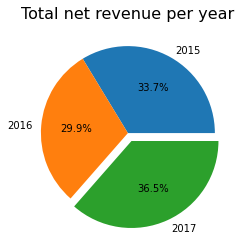

In [4]:
plt.pie(df.groupby('year')['net_revenue'].sum(), labels=['2015', '2016', '2017'],explode =(0,0,0.1), autopct='%1.1f%%')
plt.title("Total net revenue per year", fontsize=16)
plt.show()

## 2 New Customer Revenue e.g. new customers not present in previous year only

In [5]:
"""New Customer Revenue e.g. new customers not present in previous year only"""
y = df.groupby('year')
y15 = y.get_group(2015)
y16 = y.get_group(2016)
y17 = y.get_group(2017)

In [6]:
"""To find new customers the only thing i have to do is to find the customers of year x+1 which are not in year x"""

# new customers revenues
def find_new_cus_rev(left, right, on, how, keep):

    new_df = pd.merge(left, right, on=on, how=how, indicator=True)

    new_df = new_df[new_df['_merge']==keep]
    return new_df

In [7]:
new_customers_2015= find_new_cus_rev(y15,y16,'customer_email', 'left', 'left_only') #all customers
new_customers_2016= find_new_cus_rev(y15,y16,'customer_email', 'right', 'right_only')
new_customers_2017= find_new_cus_rev(y16,y17,'customer_email', 'right', 'right_only')

In [8]:
print(f"Revenue of new customers in 2015 = {new_customers_2015.net_revenue_x.sum()}")
print(f"Revenue of new customers in 2016 = {new_customers_2016.net_revenue_y.sum()}")
print(f"Revenue of new customers in 2017 = {new_customers_2017.net_revenue_y.sum()}")

Revenue of new customers in 2015 = 21571632.070000004
Revenue of new customers in 2016 = 18245491.01
Revenue of new customers in 2017 = 28776235.039999995


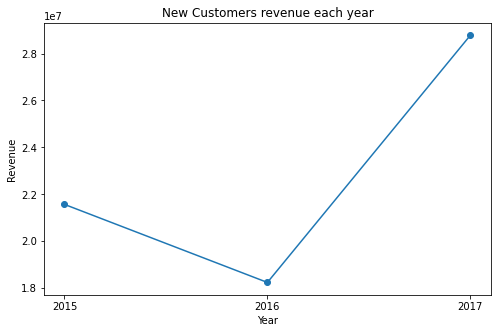

In [9]:
l = [new_customers_2015.net_revenue_x.sum(), new_customers_2016.net_revenue_y.sum(),new_customers_2017.net_revenue_y.sum() ]
plt.figure(figsize=[8,5])
plt.scatter([2015,2016,2017], l)
plt.plot([2015,2016,2017], l)
plt.xticks([2015,2016,2017])
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.title("New Customers revenue each year")
plt.show()

## 3	Existing Customer Growth 

In [10]:
""" Find existing customer for each year  --> merge"""
d1516 = find_new_cus_rev(y15,y16,'customer_email', 'inner', 'both')
d1617 = find_new_cus_rev(y16,y17,'customer_email', 'inner', 'both')

In [11]:
# Existing Customer Growth per customer
ECG15_16 = d1516['net_revenue_y'] - d1516['net_revenue_x']
ECG16_17 = d1617['net_revenue_y'] - d1617['net_revenue_x']

# Existing Customer Growth total
print(f"Year 15->16 = {np.sum(ECG15_16)}")
print(f"Year 16->17 = {np.sum(ECG16_17)}")

Year 15->16 = 20335.459999999985
Year 16->17 = 20611.340000000004


## 4 Revenue lost from attrition 

In [12]:
#Year 2016
customersleftafter2016 = find_new_cus_rev(y16,y17,'customer_email', 'left', 'left_only')
customerscamein2016 = find_new_cus_rev(y15,y16,'customer_email', 'right', 'right_only')
net_decline_in_reoccurring_revenue = customersleftafter2016['net_revenue_x'].sum() - customerscamein2016['net_revenue_y'].sum()
revenue_attrition_2016 = net_decline_in_reoccurring_revenue/y16['net_revenue'].sum()
print(f"Revenue Attrition rate 2016 = {np.round(revenue_attrition_2016,2)}")

Revenue Attrition rate 2016 = 0.19


## 5 Existing Customer Revenue Current Year

- I assert that by saying existing customer we mean the customer who still exists in 2017. So inner join 15+17, 16+17

In [13]:
existing_customer2015 = find_new_cus_rev(y15,y17,'customer_email', 'right', 'both')
existing_customer2016 = find_new_cus_rev(y16,y17,'customer_email', 'right', 'both')

In [14]:
print(f"Existing_customer revenue year 2015 = {existing_customer2015['net_revenue_x'].sum()}")
print(f"Existing_customer revenue year 2016 = {existing_customer2016['net_revenue_x'].sum()}")
d = pd.merge(existing_customer2015,existing_customer2016, on='customer_email', how='inner' )
print(f"Existing_customer revenue year 2017 = {d['net_revenue_y_y'].sum()}")

Existing_customer revenue year 2015 = 868493.65
Existing_customer revenue year 2016 = 2620648.65
Existing_customer revenue year 2017 = 764387.7300000001


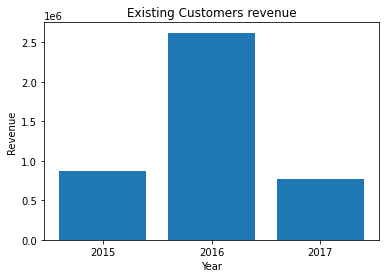

In [15]:
b = [existing_customer2015['net_revenue_x'].sum(), existing_customer2016['net_revenue_x'].sum(), d['net_revenue_y_y'].sum()]
plt.bar([2015,2016,2017],b)
plt.xticks([2015,2016,2017])
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.title("Existing Customers revenue")
plt.show()

## 6 Existing Customer Revenue Prior Year

In [16]:
Existing_customer_revenue_prior_of_2016 = find_new_cus_rev(y15,y16,'customer_email', 'right', 'both')

print(f"Existing_customer_revenue_prior_of_2016: {Existing_customer_revenue_prior_of_2016['net_revenue_x'].sum()}")

Existing_customer_revenue_prior_of_2016: 7465117.12


In [17]:
Existing_customer_revenue_prior_of_2017 = find_new_cus_rev(y16,y17,'customer_email', 'right', 'both')

print(f"Existing_customer_revenue_prior_of_2017: {Existing_customer_revenue_prior_of_2017['net_revenue_x'].sum()}")

Existing_customer_revenue_prior_of_2017: 2620648.65


## 7 Total Customers Current Year

In [18]:
for year, data in zip([2015,2016,2017], [y15,y16,y17]):
    print(f"Total Customers in year {year} = {np.unique(data['customer_email']).shape[0]}")

Total Customers in year 2015 = 231294
Total Customers in year 2016 = 204646
Total Customers in year 2017 = 249987


## 8 Total Customers Previous Year

In [19]:
print("Total customers from previous years can be also seen in paragraph 7")
print("So now we will see the total difference in customers in each year\n")

print(f"Total Customers' difference from 2015 to 2016 = {np.unique(y16['customer_email']).shape[0] - np.unique(y15['customer_email']).shape[0]}")
print(f"Total Customers' difference from 2016 to 2017 = {np.unique(y17['customer_email']).shape[0] - np.unique(y16['customer_email']).shape[0]}")

Total customers from previous years can be also seen in paragraph 7
So now we will see the total difference in customers in each year

Total Customers' difference from 2015 to 2016 = -26648
Total Customers' difference from 2016 to 2017 = 45341


## 9 New Customers

In [20]:
print(f"New customers from 2015 to 2016 = {np.unique(new_customers_2016['customer_email']).shape[0]}")
print(f"New customers from 2016 to 2017 = {np.unique(new_customers_2017['customer_email']).shape[0]}")

new_customers_2015_17= find_new_cus_rev(y15,y17,'customer_email', 'right', 'right_only')
print(f"New customers from 2015 to 2017 = {np.unique(new_customers_2015_17['customer_email']).shape[0]}")


New customers from 2015 to 2016 = 145062
New customers from 2016 to 2017 = 229028
New customers from 2015 to 2017 = 243059


## 10 Lost Customers

In [21]:
lost_customers_from_2015 = find_new_cus_rev(y15,y16,'customer_email', 'left', 'left_only')
lost_customers_from_2016 = find_new_cus_rev(y16,y17,'customer_email', 'left', 'left_only')
lost_customers_from_2015_17 = find_new_cus_rev(y15,y17,'customer_email', 'left', 'left_only')
print(f"Lost customers from year 2015 to 2016 = {np.unique(lost_customers_from_2015['customer_email']).shape[0]}")
print(f"Lost customers from year 2016 to 2017 = {np.unique(lost_customers_from_2016['customer_email']).shape[0]}")
print(f"Lost customers from year 2015 to 2017 = {np.unique(lost_customers_from_2015_17['customer_email']).shape[0]}")

Lost customers from year 2015 to 2016 = 171710
Lost customers from year 2016 to 2017 = 183687
Lost customers from year 2015 to 2017 = 224366


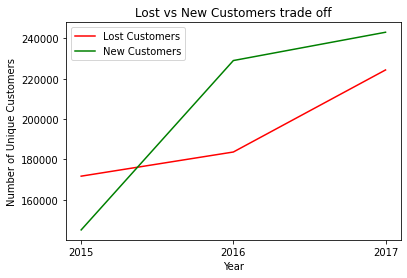

New Customers are more that lost customers although there is an increasing trend in both


In [23]:
lost = [171710,183687,224366]
new = [145062,229028, 243059]
plt.plot([2015,2016,2017],lost , label='Lost Customers', color='red')
plt.plot([2015,2016,2017],new , label='New Customers', color='green')
plt.xticks([2015,2016,2017])
plt.xlabel("Year")
plt.ylabel("Number of Unique Customers")
plt.title("Lost vs New Customers trade off")
plt.legend()
plt.show()

print("New Customers are more that lost customers although there is an increasing trend in both")

In [187]:
!jupyter nbconvert Case-Study_2_NG.ipynb --no-input --to html

[NbConvertApp] Converting notebook Case-Study_2_NG.ipynb to html
[NbConvertApp] Writing 574002 bytes to Case-Study_2_NG.html
